## Шаг. 

In [1]:
#импорт необходимых библиотек
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import warnings # импорт контроля предупреждений
warnings.simplefilter('ignore') 

In [3]:
#Выводим данные для ознакомления
display(users.head(5))
display(calls.head(5))
display(messages.head(5))
display(internet.head(5))
display(tariffs.head(5))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [4]:
#Смотрим разброс данных по времени и проверяем нет ли в них данных за 2017 и 2019й год 
cls_date = pd.to_datetime(calls['call_date'])
msg_date = pd.to_datetime(messages['message_date'])
int_date = pd.to_datetime(internet['session_date'])

print('Разброс дат по звонкам:', cls_date.min(), '-', cls_date.max())
print('Разброс дат по сообщениям:', msg_date.min(), '-', msg_date.max())
print('Разброс дат по трафику:', int_date.min(), '-', int_date.max())

Разброс дат по звонкам: 2018-01-01 00:00:00 - 2018-12-31 00:00:00
Разброс дат по сообщениям: 2018-01-02 00:00:00 - 2018-12-31 00:00:00
Разброс дат по трафику: 2018-01-01 00:00:00 - 2018-12-31 00:00:00


**Вывод**

В каждой выборке — данные о клиенте. Часть их описывает непосредственно клиента: фио, возраст, город проживания. Остальные данные формируют представление об объемах потребления услуг по части коммуникации. 

Данные таблицы выглядят приемлемо для проведения исследования.

## Шаг. 

### Приведите данные к нужным типам
Нам необходимо вычислить расходы пользователя по месяцам. Чтобы правильно это подсчитать, для каждой таблицы я создам столбец month, который будет хранить номер месяца. Поскольку все данные за 2018 год, мы можем быть уверены, что данных из разных месяцев не будут пересекаться.

In [5]:
# создание столбца для хранения номера месяца
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month

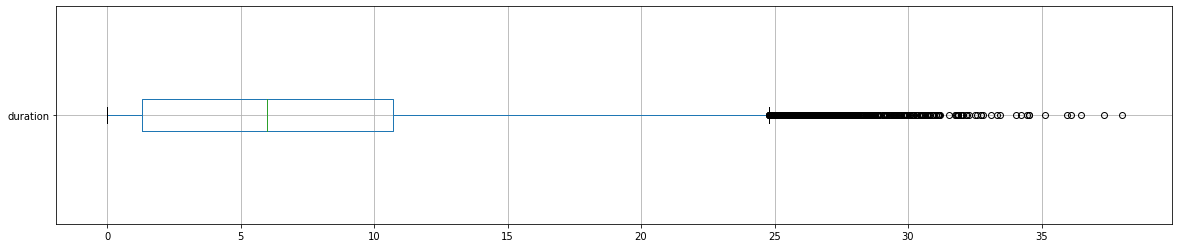

In [6]:
# Проверяем данные звонков на анамалии
calls.boxplot(column = 'duration', figsize = (20,4), vert=False)

In [7]:
# округление израсходованных минут звонка, в большую сторону и переводим в целое
calls['duration'] = np.ceil(calls['duration']).astype('int')
display(calls.head(5))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [8]:
# переводим мегабайты трафика в гигабайты, округляем в большую сторону и переводим в целое
tariffs['gb_per_month_included'] = np.ceil(tariffs['mb_per_month_included']/1024).astype('int')
display(tariffs.head(5))

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


### Найдите и исправьте ошибки в данных, если они есть.

In [9]:
#Удаление некорректного столбца
#internet.drop('Unnamed: 0', axis=1, inplace=True)
#internet.head(5)

In [10]:
#Переименование столбцов, для последущего корректного объединения
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15
1,1000,30720,3000,1950,150,1,1,ultra,30


### Для каждого пользователя считаем количество сделанных звонков и израсходованных минут разговора по месяцам

In [11]:
#подсчет для каждого пользователя количества сделанных звонков и израсходованных минут разговора по месяцам
cls_month = calls.pivot_table(index=['user_id', 'month'], values=['duration'], aggfunc='sum').reset_index()
display(cls_month.head(5))

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


### Для каждого пользователя считаем количество отправленных сообщений по месяцам

In [12]:
#подсчет для каждого пользователя количества отправленных сообщений по месяцам
msg_month = messages.pivot_table(index=['user_id', 'month'], values=['id'], aggfunc='count').reset_index()
msg_month = msg_month.rename(columns={'id':'messages'})
display(msg_month.head(5))

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Для каждого пользователя считаем объем израсходованного интернет-трафика по месяцам

In [13]:
#подсчет дя каждого пользователя объема израсходованного интернет-трафика по месяцам
int_month = internet.pivot_table(index=['user_id', 'month'], values=['mb_used'], aggfunc='sum').reset_index()
int_month['gb_used'] = np.ceil(int_month['mb_used']/1024).astype('int')
display(int_month.head(5))

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


### помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [14]:
#объединение всех таблиц в одну методом merge()
table = cls_month.merge(msg_month, on=['month', 'user_id'], how='outer')
table = table.merge(int_month, on=['month', 'user_id'], how='outer')
table = table.merge(users, on=['user_id'], how='left')
table = table.merge(tariffs, on=['tariff'], how='left')
table

#user_id — уникальный идентификатор пользователя
#first_name — имя пользователя
#last_name — фамилия пользователя
#age — возраст пользователя (годы)
#reg_date — дата подключения тарифа (день, месяц, год)
#churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
#city — город проживания пользователя
#tarif — название тарифного плана

#tariff_name — название тарифа
#rub_monthly_fee — ежемесячная абонентская плата в рублях
#minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
#messages_included — количество сообщений в месяц, включённых в абонентскую плату
#mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
#rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
#rub_per_message — стоимость отправки сообщения сверх тарифного пакета
#rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

,user_id,month,duration,messages,mb_used,gb_used,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,159.0,22.0,2253.49,3.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
1,1000,6,172.0,60.0,23233.77,23.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
2,1000,7,340.0,75.0,14003.64,14.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
3,1000,8,408.0,81.0,14055.93,14.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
4,1000,9,466.0,57.0,14568.91,15.0,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,32.0,17206.30,17.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,15
3210,1489,10,NaN,21.0,19559.44,20.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,15
3211,1489,11,NaN,20.0,17491.56,18.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,15
3212,1489,12,NaN,35.0,17322.51,17.0,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,15


In [15]:
# созданные столбцы
table.columns

Index(['user_id', 'month', 'duration', 'messages', 'mb_used', 'gb_used', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'gb_per_month_included'],
      dtype='object')

In [16]:
# подсчет помесячной выручки с каждого пользователя 
#(вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
# остаток умножьте на значение из тарифного плана; 
# прибавьте абонентскую плату, соответствующую тарифному плану). 

dohod_cls = (table['duration'] - table['minutes_included']) * table['rub_per_minute'] 
dohod_cls[dohod_cls < 0] = 0 #обнуляем отрицательные значения, для правильного подсчета общего дохода
dohod_cls[dohod_cls.isna()] = 0 #задаем 0 для значений которые не указаны, предпологая что звонков не было

dohod_msg = (table['messages'] - table['messages_included']) * table['rub_per_message']
dohod_msg[dohod_msg < 0] = 0
dohod_msg[dohod_msg.isna()] = 0

dohoh_int = (table['gb_used'] - table['gb_per_month_included']) * table['rub_per_gb']
dohoh_int[dohoh_int < 0] = 0
dohoh_int[dohoh_int.isna()] = 0

dohod = dohod_cls + dohod_msg + dohoh_int + table['rub_monthly_fee']
table['dohod'] = dohod # добавление столбца с расчетом в таблицу
display(table.head(5))

,user_id,month,duration,messages,mb_used,gb_used,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,dohod
0,1000,5,159.0,22.0,2253.49,3.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30,1950.0
1,1000,6,172.0,60.0,23233.77,23.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30,1950.0
2,1000,7,340.0,75.0,14003.64,14.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30,1950.0
3,1000,8,408.0,81.0,14055.93,14.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30,1950.0
4,1000,9,466.0,57.0,14568.91,15.0,52,NaN,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,30,1950.0


In [17]:
# Проверяем отсудствие Nan'ов в доходе
display(table[table['dohod'].isna()])

,user_id,month,duration,messages,mb_used,gb_used,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,dohod


### Вывод 

Мы округлили объем минут разговоров и трафика в большую сторону. Перевели мб в гб. Столбцы, содержащие ошибки и при этом не участвующие в исследовании удалили. Переименовали столбец наименования тарифа к единому имени с целью последующего сбора разрозненных выборок в единую таблицу. Сгруппировали данные о потраченных минутах, сообщениях и трафике по пользователям и месяцам. Провели расчеты. 

## Шаг. 

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

###  Посчитайте среднее количество, дисперсию и стандартное отклонение. 

In [18]:
# cколько минут разговора требуется пользователям каждого тарифа в месяц
cls_data = table.pivot_table(index=['tariff'], values='duration', aggfunc=['mean', 'var', 'std'])
display(cls_data)

,mean,var,std
,duration,duration,duration
tariff,,,
smart,419.062978,35844.189551,189.325618
ultra,545.451104,94203.418396,306.925754


In [19]:
# какое количество сообщений требуется пользователям каждого тарифа в месяц
msg_data = table.pivot_table(index=['tariff'], values='messages', aggfunc=['mean', 'var', 'std'])
display(msg_data)

,mean,var,std
,messages,messages,messages
tariff,,,
smart,38.716441,717.594201,26.787949
ultra,61.161006,2109.659183,45.931026


In [20]:
# какое трафика требуется пользователям каждого тарифа в месяц
int_data = table.pivot_table(index=['tariff'], values='gb_used', aggfunc=['mean', 'var', 'std'])
display(int_data)

,mean,var,std
,gb_used,gb_used,gb_used
tariff,,,
smart,16.336176,32.923756,5.737923
ultra,19.694359,94.146734,9.702924


In [21]:
# какой доход приносят пользователи каждого тарифа в месяц
int_data = table.pivot_table(index=['tariff'], values='dohod', aggfunc=['mean', 'var', 'std'])
display(int_data)

,mean,var,std
,dohod,dohod,dohod
tariff,,,
smart,1289.973531,669785.708006,818.404367
ultra,2070.152284,141516.745079,376.187114


### Постройте гистограммы.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8507a56450>,
      dtype=object)

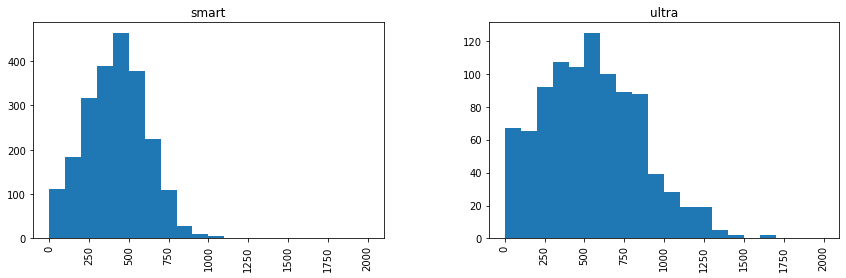

In [22]:
#гистаграммы продолжительности разговора по тарифам
table.hist(column='duration', by='tariff', bins=20, range =(0,2000), figsize = (14,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8507970510>,
      dtype=object)

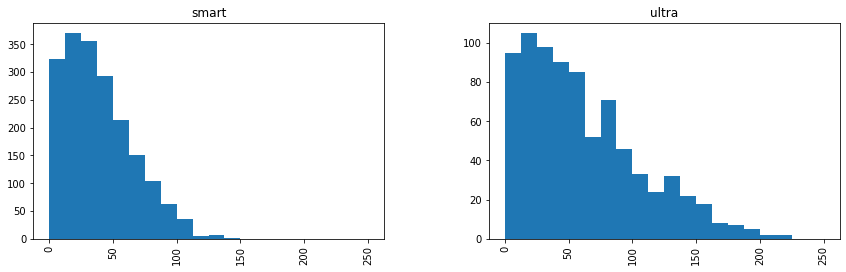

In [23]:
#гистаграммы количества сообщений по тарифам
table.hist(column='messages', by='tariff', bins=20, range =(0,250), figsize = (14,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85077cd090>,
      dtype=object)

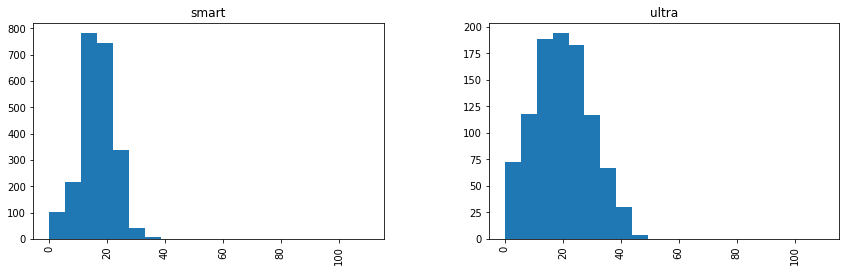

In [24]:
#гистаграммы количества трафика по тарифам
table.hist(column='gb_used', by='tariff', bins=20, range =(0,110), figsize = (14,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8506db4490>,
      dtype=object)

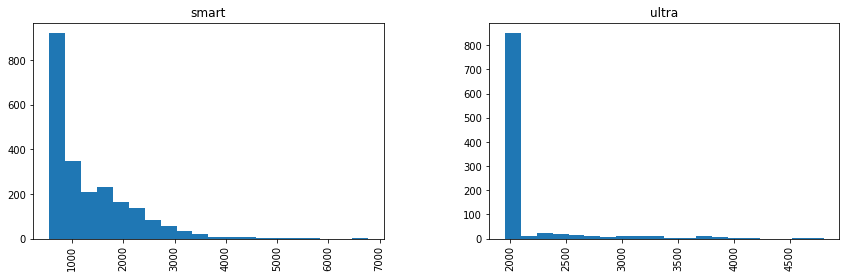

In [25]:
#гистаграммы по выручке
table.hist(column='dohod', by='tariff', bins=20, figsize = (14,4))

### Вывод 

Посчитали среднее, дисперсию и стандартное отклонение. Построили гистрограммы по объему потребляемых услуг в двух тарифах.
В Ultra больше минут, сообщений и трафика тратится чем в Smart.

## Шаг. 

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f85111ec150>,
      dtype=object)

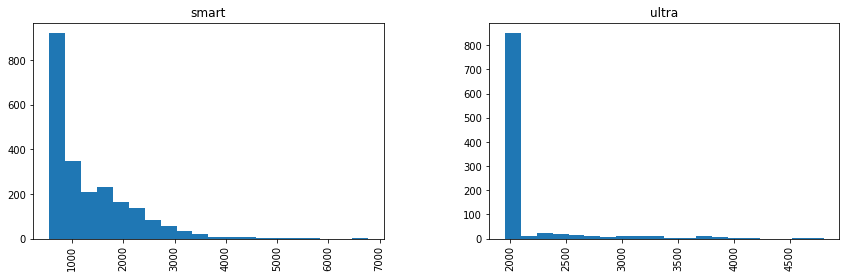

In [26]:
#гистаграммы количества трафика по тарифам
table.hist(column='dohod', by='tariff', bins=20, figsize = (14,4))

In [27]:
#Вычисляем средний доход по пользователям, по тарифам.
smart_g = table.query('tariff == "smart"')['dohod']
ultra_g = table.query('tariff == "ultra"')['dohod']

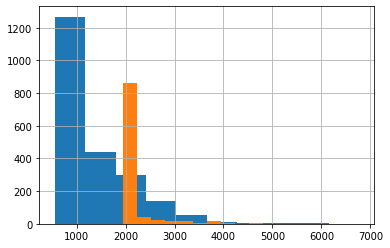

In [28]:
#Отображаем полученные распределения
display(smart_g.hist())
display(ultra_g.hist())

Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
H₀ всегда предполагает знак равенства.     
    
Двусторонняя альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Есть отклонение в обе стороны (большая и меньшая).

Дисперсии считаются равными по умолчанию при применении t-тест и указании в параметре equal_var=False

alpha = .01 # выбран критический уровень статистической значимости 

In [29]:
# проверка гипотез
from scipy import stats as st 

alpha = .01 # критический уровень статистической значимости


results = st.ttest_ind(smart_g, ultra_g) 
print(results)

if results.pvalue < alpha:
    print("Данные разные. Гипотеза подтверждена")
else:
    print("Данные похожи. Гипотеза отвергнута") 

Ttest_indResult(statistic=-28.611056741704818, pvalue=1.4229814360764067e-160)
Данные разные. Гипотеза подтверждена


Показатели выручки по тарифам различаются существенно. Пользователи тарифа "Смарт", как правило, платит больше за счет нехватки нужного объема включеннных в тариф услуг. Для компании такие пользователи выгодны.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [30]:
#Вычисляем средний доход по пользователям, по тарифам.
smart_g = table.query('city == "Москва"')['dohod']
ultra_g = table.query('city != "Москва"')['dohod']

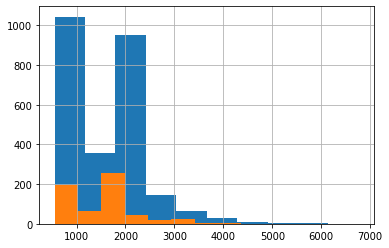

In [31]:
#Отображаем полученные распределения
ultra_g.hist()
smart_g.hist()

Нулевая гипотеза: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 
H₀ всегда предполагает знак равенства.     
      
Односторонняя альтернативная гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 

Дисперсии считаются равными по умолчанию при применении t-тест и указании в параметре equal_var=False

alpha = .01 # выбран критический уровень статистической значимости. 

In [32]:
# проверка гипотез
from scipy import stats as st 

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - данные разные

results = st.ttest_ind(smart_g, ultra_g) 
print(results)

if results.pvalue < alpha:
    print("Данные разные. Гипотеза подтверждена")
else:
    print("Данные похожи. Гипотеза отвергнута") 

Ttest_indResult(statistic=0.606816942705698, pvalue=0.5440152911670224)
Данные похожи. Гипотеза отвергнута


Да, в Москве больше пользователей, но это различие не влияет на выручку.

## Шаг. Общий вывод

Доход от пользователя по тарифу Компании выгоднее тариф "Смарт" так как пользователи часто выходят за границы лимита и вынуждены платить за дополнительные объемы услуг. Тариф "Ультра", напротив, включает в себя тот объем, который обычно не успевают использовать пользователи и от таких не поступает оплаты за сверхлимит. Разумеет компании интереснее "Смарт".          

В вопросе прибыли, получаемой от тарифа - доход от "Ультра" выше дохода от "Смарт".